<a href="https://colab.research.google.com/github/Meenu1997/Drivendata_PumpitUp/blob/main/PumpitUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import time
import datetime
from typing import Dict, Tuple

 **Imports** 

In [ ]:
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Authenticating Drive Access**

In [ ]:
training_set_labels = drive.CreateFile({'id':'1zBICQRq9usBLQt3qbUg8IkI6RSMHHOBD'})
training_set_labels.GetContentFile('Training set labels.csv')
training_labels = pd.read_csv('Training set labels.csv')


training_set_values = drive.CreateFile({'id':'1-yj3zsh3ghVeDVklaiI7R-e8OhQ0yW_a'})
training_set_values.GetContentFile('Training set values.csv')
training_values = pd.read_csv('Training set values.csv')

testing_set_values = drive.CreateFile({'id': '1r1M0Td7pNLHTjbyAq3BfTGJfZ_iGv5Qy'})
testing_set_values.GetContentFile('Test set values.csv')
test_values = pd.read_csv('Test set values.csv')

**Reading CSV Files**

In [ ]:
dataset = training_values.join(other = training_labels.set_index('id'), on='id')

Joining labels and Features using Id

In [ ]:
dataset.head().T

,0,1,2,3,4
id,69572,8776,34310,67743,19728
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0


In [ ]:
dataset.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [ ]:
dataset.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [ ]:
dataset.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

**Finding Derived Features to eliminate Unwanted Columns in model training**

In [ ]:
dataset['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

'recorded_by' can be eliminated as it has same values for all rows

In [ ]:
quantity_quantitygp_check = 0
for i in range (dataset['id'].count()):
  if dataset['quantity'][i] != dataset['quantity_group'][i]:
    quantity_quantitygp_check = quantity_quantitygp_check+1
quantity_quantitygp_check

0

quantity or quantity group column can be dropped

In [ ]:
waterquality_qualitygp_check =0
for i in range (dataset['id'].count()):
  if dataset['water_quality'][i] != dataset['quality_group'][i]:
    waterquality_qualitygp_check = waterquality_qualitygp_check+1
waterquality_qualitygp_check

51664

In [ ]:
dataset['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [ ]:
dataset['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [ ]:
dataset.groupby(['water_quality','quality_group']).count()

,,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
water_quality,quality_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
coloured,colored,490,490,490,391,490,391,490,490,490,490,490,490,490,490,490,490,490,490,478,490,431,123,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490
fluoride,fluoride,200,200,200,181,200,176,200,200,200,200,200,200,200,200,200,200,200,200,197,200,188,138,186,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
fluoride abandoned,fluoride,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,16,17,14,1,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
milky,milky,804,804,804,788,804,785,804,804,804,804,804,804,804,804,804,804,804,804,736,804,344,44,801,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804
salty,salty,4856,4856,4856,4803,4856,4801,4856,4856,4856,4856,4856,4638,4856,4856,4856,4856,4856,4856,4485,4856,4419,1453,4706,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856
salty abandoned,salty,339,339,339,331,339,331,339,339,339,339,339,338,339,339,339,339,339,339,239,339,332,62,329,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339
soft,good,50818,50818,50818,47945,50818,47948,50818,50818,50818,50818,50818,50666,50818,50818,50818,50818,50818,50818,48437,50818,48262,28629,48416,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818
unknown,unknown,1876,1876,1876,1309,1876,1296,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1478,1876,1533,784,1399,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876


'water quantity' or 'quantity group' can be dropped

In [ ]:
dataset['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [ ]:
dataset['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [ ]:
dataset.groupby(['payment','payment_type']).count()

,,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
payment,payment_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
never pay,never pay,25348,25348,25348,23440,25348,23443,25348,25348,25348,25348,25348,25246,25348,25348,25348,25348,25348,25348,24594,25348,23604,11385,23776,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348
other,other,1054,1054,1054,1038,1054,1039,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,977,1054,1028,220,995,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
pay annually,annually,3642,3642,3642,3533,3642,3529,3642,3642,3642,3642,3642,3591,3642,3642,3642,3642,3642,3642,3626,3642,3604,2355,3585,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642
pay monthly,monthly,8300,8300,8300,8084,8300,8083,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8226,8300,7877,5970,8221,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300
pay per bucket,per bucket,8985,8985,8985,8717,8985,8711,8985,8985,8985,8985,8985,8767,8985,8985,8985,8985,8985,8985,8552,8985,8816,6707,8700,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985
pay when scheme fails,on failure,3914,3914,3914,3869,3914,3872,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3896,3914,3793,1264,3777,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914
unknown,unknown,8157,8157,8157,7084,8157,7068,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,6195,8157,6801,3333,7290,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157


Payment or payment_type can be dropped

In [ ]:
dataset['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [ ]:
dataset['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [ ]:
dataset.groupby(['waterpoint_type','waterpoint_type_group']).count()

,,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,status_group
waterpoint_type,waterpoint_type_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cattle trough,cattle trough,116,116,116,113,116,110,116,116,116,116,116,116,116,116,116,116,116,116,114,116,113,71,88,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116
communal standpipe,communal standpipe,28522,28522,28522,25778,28522,25790,28522,28522,28522,28522,28522,28407,28522,28522,28522,28522,28522,28522,27196,28522,28030,23049,26368,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522
communal standpipe multiple,communal standpipe,6103,6103,6103,6064,6103,6063,6103,6103,6103,6103,6103,5859,6103,6103,6103,6103,6103,6103,5815,6103,6032,5218,6051,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103
dam,dam,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
hand pump,hand pump,17488,17488,17488,16997,17488,16977,17488,17488,17488,17488,17488,17485,17488,17488,17488,17488,17488,17488,16255,17488,15368,1468,16978,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488
improved spring,improved spring,784,784,784,743,784,748,784,784,784,784,784,784,784,784,784,784,784,784,773,784,701,83,780,784,784,784,784,784,784,784,784,784,784,784,784,784,784,784,784
other,other,6380,6380,6380,6063,6380,6050,6380,6380,6380,6380,6380,6371,6380,6380,6380,6380,6380,6380,5906,6380,5272,1340,6073,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380


waterpoint type or waterpoint type group can ber dropped

In [ ]:
dataset['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [ ]:
dataset['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [ ]:
dataset['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [ ]:
dataset.groupby(['source_type','source_class','source']).count()

id  ...  status_group
source_type          source_class source                       ...              
borehole             groundwater  hand dtw                874  ...           874
                                  machine dbh           11075  ...         11075
dam                  surface      dam                     656  ...           656
other                unknown      other                   212  ...           212
                                  unknown                  66  ...            66
rainwater harvesting surface      rainwater harvesting   2295  ...          2295
river/lake           surface      lake                    765  ...           765
                                  river                  9612  ...          9612
shallow well         groundwater  shallow well          16824  ...         16824
spring               groundwater  spring                17021  ...         17021

[10 rows x 38 columns]

source_type and source_class can be dropped

In [ ]:
dataset['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [ ]:
dataset['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [ ]:
dataset.groupby(['management_group','management']).count()

id  ...  status_group
management_group management               ...              
commercial       company             685  ...           685
                 private operator   1971  ...          1971
                 trust                78  ...            78
                 water authority     904  ...           904
other            other               844  ...           844
                 other - school       99  ...            99
parastatal       parastatal         1768  ...          1768
unknown          unknown             561  ...           561
user-group       vwc               40507  ...         40507
                 water board        2933  ...          2933
                 wua                2535  ...          2535
                 wug                6515  ...          6515

[12 rows x 39 columns]

managementgroup can be dropped

In [ ]:
dataset['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [ ]:
dataset['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [ ]:
dataset['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [ ]:
dataset.groupby(['extraction_type_class','extraction_type_group','extraction_type']).count()

id  ...  status_group
extraction_type_class extraction_type_group extraction_type                   ...              
gravity               gravity               gravity                    26780  ...         26780
handpump              afridev               afridev                     1770  ...          1770
                      india mark ii         india mark ii               2400  ...          2400
                      india mark iii        india mark iii                98  ...            98
                      nira/tanira           nira/tanira                 8154  ...          8154
                      other handpump        other - mkulima/shinyanga      2  ...             2
                                            other - play pump             85  ...            85
                                            other - swn 81               229  ...           229
                                            walimi                        48  ...            48
                      swn 80                swn 80                      3670  ...          3670
motorpump             mono                  mono                        2865  ...          2865
                      other motorpump       cemo                          90  ...            90
                                            climax                        32  ...            32
other                 other                 other                       6430  ...          6430
rope pump             rope pump             other - rope pump            451  ...           451
submersible           submersible           ksb                         1415  ...          1415
                                            submersible                 4764  ...          4764
wind-powered          wind-powered          windmill                     117  ...           117

[18 rows x 38 columns]

extraction_type_class and extraction_type_group	can be dropped

In [ ]:
dataset = dataset.drop(['id'], axis=1)

**Id is not useful feature. It can be removed**

In [ ]:
(dataset['longitude'] == 0).sum()

1812

In [ ]:
def replace_zero_longitude_data(dataset: pd.DataFrame):
    dataset['longitude'] = dataset['longitude'].replace(0, dataset['longitude'].mean())

In [ ]:
replace_zero_longitude_data(dataset)

Replacing zero longitude value with mean of the longitude column

In [ ]:
def convert_column_to_string(dataset, column_name):
    dataset[column_name] = dataset[column_name].astype(str)

In [ ]:
convert_column_to_string(dataset, 'permit')
convert_column_to_string(dataset, 'public_meeting')

Converting Boolean column permit and public meeting column into string

In [ ]:
categorical_columns = ['funder',
       'installer', 'wpt_name', 
       'basin', 'subvillage', 'region', 'lga',
       'ward', 'public_meeting',
       'scheme_management', 
       'scheme_name', 
       'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 
       'status_group'] 

In [ ]:
dataset.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [ ]:
def replace_notfilled_value(dataset: pd.DataFrame):
    for column in categorical_columns:
        if column not in dataset.columns:
            continue
        
        dataset[column] = dataset[column].fillna('n/a')

In [ ]:
replace_notfilled_value(dataset)

Replacing not filled value with the string 'n/a'

In [ ]:
def encode_categorical_columns(dataset: pd.DataFrame) -> Dict[str, LabelEncoder]:
    encoders = {} 
    for column in categorical_columns:
        if column not in dataset.columns:
            continue
            
        labelencode = LabelEncoder()
        labelencode.fit(dataset[column])

        dataset[column] = labelencode.transform(dataset[column])
        encoders[column]= labelencode
        
    return encoders

In [ ]:
encoders = encode_categorical_columns(dataset)

**Encoding the values of the catecorical columns**

In [ ]:
dataset.head().T

,0,1,2,3,4
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,1369,469,825,1741,20
gps_height,1390,1399,686,263,0
installer,1518,545,2048,1852,119
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
wpt_name,37399,37195,14572,37285,35529
num_private,0,0,0,0,0
basin,1,4,5,7,4


In [ ]:
date_columns = ['date_recorded']

In [ ]:
def date_epoch(dataset: pd.DataFrame, timestamp_format="%Y-%m-%d"):
    for column in date_columns:
        dataset[column] = [ datetime.datetime.strptime(x, timestamp_format).timestamp() for x in dataset[column]]

In [ ]:
date_epoch(dataset)

Changing the date value to epoch value

In [ ]:
def drop_recorded_by(dataset: pd.DataFrame):
    dataset.drop('recorded_by', axis=1, inplace=True)

In [ ]:
drop_recorded_by(dataset)

In [ ]:
def drop_columns(dataset: pd.DataFrame):
    drop_columns = ['region', 
                    'extraction_type_group', 'extraction_type_class', 
                    'management_group', 
                    'payment', 
                    'quality_group', 
                    'quantity', 
                    'source_type',
                    'source_class', 
                    'waterpoint_type_group']
    dataset.drop(drop_columns,1, inplace=True)

In [ ]:
drop_columns(dataset)

In [ ]:
def scale_columns(dataset: pd.DataFrame):
    scaler = StandardScaler()
    dataset = scaler.fit_transform(dataset)

In [ ]:
scale_columns(dataset)

Standardization 

In [ ]:
def prepare_dataset(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
    id_column = dataset['id']
    
    dataset = dataset.drop(['id'], axis=1)
    replace_zero_longitude_data(dataset)

    convert_column_to_string(dataset, 'permit')
    convert_column_to_string(dataset, 'public_meeting')

    replace_notfilled_value(dataset)

    encode_categorical_columns(dataset)
    date_epoch(dataset)

    drop_recorded_by(dataset)
    drop_columns(dataset)

    scale_columns(dataset)
    
    return dataset, id_column

In [ ]:
def split_dataset(dataset: pd.DataFrame): 
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    return train_test_split(X, y, test_size=0.3, random_state = 0)

In [ ]:
X_train, X_test, y_train, y_test = split_dataset(dataset)

Spliting the Train_Dataset to Traindata and Test data

In [ ]:
models_result = {}

In [ ]:
def update_result_print(models_result, model_name, model, X_test, y_test):
    accuracy = model.score(X_test, y_test)

    models_result[model_name] = accuracy
    print(f'"{model_name}" has accuracy: {accuracy}')

In [ ]:
def plot_features_importances(classifier, X_train):
    series = pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=True)
    series = series.plot(kind='pie', figsize=(8,8))
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.show()

In [ ]:
def random_forest(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(max_depth=25, n_estimators = 42*5, criterion = 'entropy', random_state = 0)

    clf.fit(X_train, y_train)
    
    return clf

In [ ]:
rf_clf = random_forest(X_train, y_train)
update_result_print(models_result, 'Random forest', rf_clf, X_test, y_test)


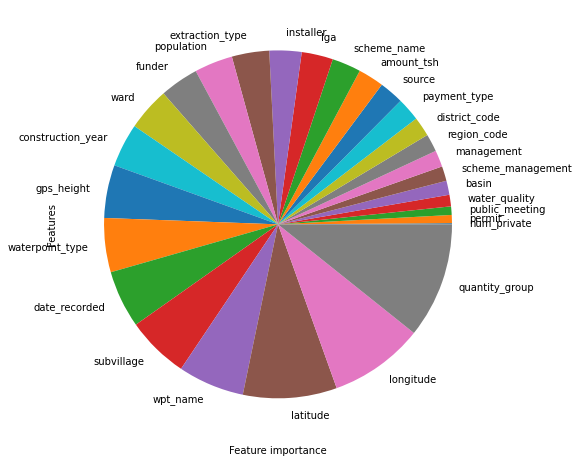

In [ ]:
plot_features_importances(rf_clf, X_train)

In [ ]:
def xgb(X_train, y_train):
    from xgboost import XGBClassifier
    clf = XGBClassifier(nthread=2, num_class=3, 
                        min_child_weight=3, max_depth=15,
                        gamma=0.5, scale_pos_weight=0.8,
                        subsample=0.7, colsample_bytree = 0.8,
                        objective='multi:softmax')
    clf.fit(X_train, y_train)
    
    return clf

In [ ]:
xgb_clf = xgb(X_train, y_train)
update_result_print(models_result, 'XGBoost', xgb_clf, X_test, y_test)

"XGBoost" has accuracy: 0.8135802469135802


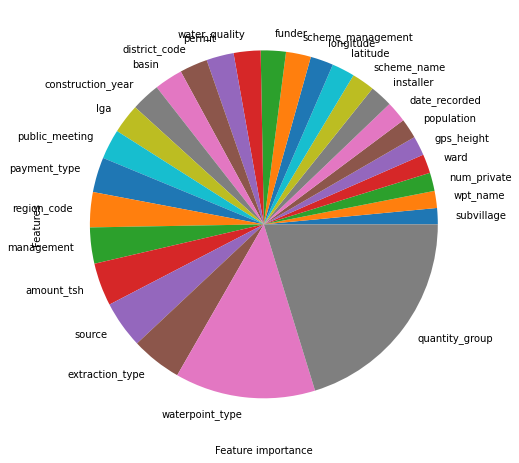

In [ ]:
plot_features_importances(xgb_clf, X_train)

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [ ]:
def catboost(X_train, y_train,catogory_features):
    from catboost import CatBoostClassifier
    clf = CatBoostClassifier()
    
    clf.fit(X_train, y_train,cat_features = catogory_features)
    
    return clf

In [ ]:
c =['funder',
       'installer', 'wpt_name', 
       'basin', 'subvillage', 'lga',
       'ward', 'public_meeting',
       'scheme_management', 
       'scheme_name', 
       'permit',
       'extraction_type',
       'management', 'payment_type',
       'water_quality', 'quantity_group',
       'source', 'waterpoint_type'] 
cat_clf = catboost(X_train, y_train,c)
update_result_print(models_result, 'CatBoost', cat_clf, X_test, y_test)
# plot_features_importances(cat_clf, X_train)

Learning rate set to 0.095694
0:	learn: 1.0218334	total: 710ms	remaining: 11m 48s
1:	learn: 0.9609885	total: 1.4s	remaining: 11m 37s
2:	learn: 0.9131279	total: 2.05s	remaining: 11m 20s
3:	learn: 0.8733033	total: 2.75s	remaining: 11m 26s
4:	learn: 0.8376179	total: 3.37s	remaining: 11m 11s
5:	learn: 0.8077813	total: 3.99s	remaining: 11m
6:	learn: 0.7823160	total: 4.55s	remaining: 10m 45s
7:	learn: 0.7596367	total: 5.11s	remaining: 10m 34s
8:	learn: 0.7385573	total: 5.66s	remaining: 10m 23s
9:	learn: 0.7205822	total: 6.24s	remaining: 10m 17s
10:	learn: 0.7055836	total: 6.78s	remaining: 10m 9s
11:	learn: 0.6915285	total: 7.4s	remaining: 10m 9s
12:	learn: 0.6798026	total: 7.94s	remaining: 10m 2s
13:	learn: 0.6688659	total: 8.6s	remaining: 10m 5s
14:	learn: 0.6595816	total: 9.23s	remaining: 10m 6s
15:	learn: 0.6510521	total: 9.87s	remaining: 10m 7s
16:	learn: 0.6432385	total: 10.5s	remaining: 10m 6s
17:	learn: 0.6359287	total: 11s	remaining: 10m
18:	learn: 0.6291897	total: 11.6s	remaining: 9

In [ ]:
for k,v in sorted(models_result.items(), key=lambda entry:entry[1], reverse=True):
    print(f'{k:25s} {v}')

XGBoost                   0.8135802469135802
Random forest             0.8102693602693603
CatBoost                  0.8097643097643098


In [ ]:
real_X, real_id_column = prepare_dataset(test_values)

In [ ]:
real_y = xgb_clf.predict(real_X)

In [ ]:
status_group_encoder = encoders['status_group']

In [ ]:
real_decoded_y = pd.DataFrame(status_group_encoder.inverse_transform(real_y), columns = ['status_group'])

In [ ]:

result = pd.concat([real_id_column, real_decoded_y], axis=1)

In [ ]:
result.to_csv("../submisssion_new_XGB.csv", index=False)

In [ ]:
real_y_1 = rf_clf.predict(real_X)
status_group_encoder = encoders['status_group']
real_decoded_y = pd.DataFrame(status_group_encoder.inverse_transform(real_y_1), columns = ['status_group'])
result = pd.concat([real_id_column, real_decoded_y], axis=1)
result.to_csv("../submisssion_new_randomforest.csv", index=False)